In [1]:
#importando bibliotecas
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/ForbesRichestAtheletes.csv') #importando o dataset de atletas mais ricos
df.head() #mostrando o topo do .csv

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [3]:
len(df)

301

In [4]:
df.info() #identificando variaveis, números de valores não nulos, tipo etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [5]:
#verificando os dados faltantes
missing_data_size = df.isnull().sum()
missing_data_columns = (
    (
        missing_data_size[missing_data_size > 0]
    )
    .sort_values(ascending=False)
    .to_frame(name='Count')
)
missing_data_columns = (
    missing_data_columns.assign(
        Column=missing_data_columns.index
    )
).reset_index(drop=True)

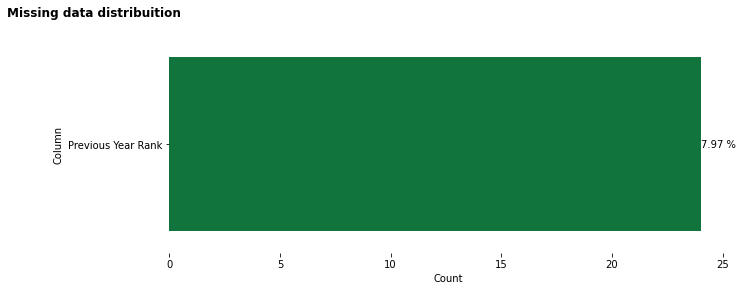

In [6]:
plt.figure(figsize=(10, 4))
ax = sn.barplot(data=missing_data_columns, x='Count', y='Column', color="#00853B")
sn.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in missing_data_columns.Count.astype(int) / len(df) * 100])
plt.suptitle("Missing data distribuition", ha='left', va='top', x=-.1, fontweight='bold')
plt.show()

In [7]:
#vendo o index dos dados faltantes
for column in missing_data_columns.Column:
    indexes = list(df[df[column].isnull()].index)
    print(f'{column}: {indexes}')

Previous Year Rank: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 266, 268, 269, 270]


In [8]:
df = df.fillna(0) #pondo 0 no lugar de todos os dados faltantes

In [9]:
#verificando se deu certo
for column in missing_data_columns.Column:
    indexes = list(df[df[column].isnull()].index)
    print(f'{column}: {indexes}')

Previous Year Rank: []


In [ ]:
#quais as nacionalidades mais bem pagas?
#qual a relação entre o esporte praticado e seus salários
#qual a relação do ranking dos jogadores com seus salarios

<AxesSubplot:xlabel='Count', ylabel='Nationality'>

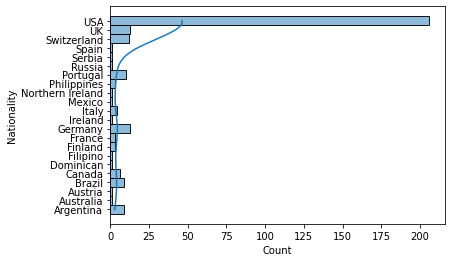

In [25]:
sn.histplot(data=df, y="Nationality", kde=True)

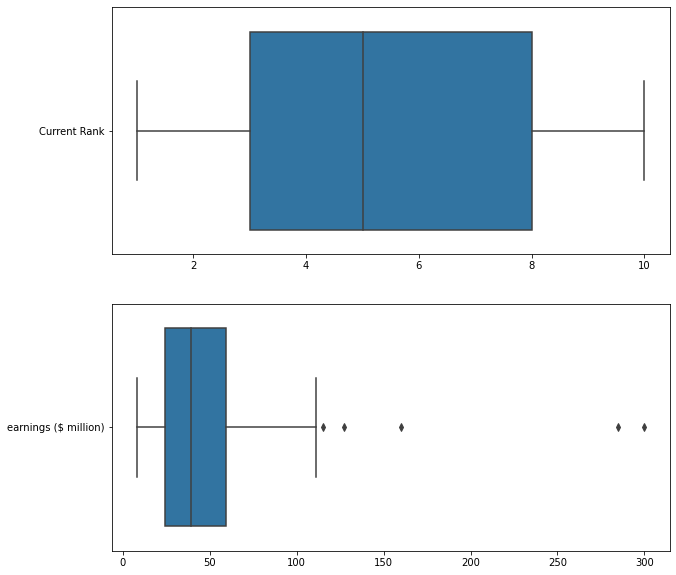

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sn.boxplot(ax=axes[0], data=df[["Current Rank"]], orient="h")
sn.boxplot(ax=axes[1], data=df[["earnings ($ million)"]], orient="h")
plt.show()